In [2]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
npts = 400
f = np.linspace(100, 110, npts)
p = np.random.gamma(1, size=npts)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


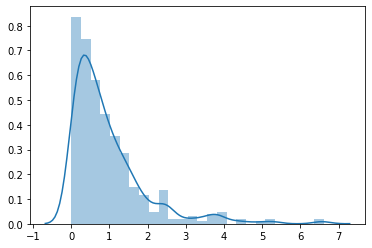

In [58]:
sns.distplot(p)

In [59]:
def lor(f, freq, w, h):
    diff = (f - freq)**2
    norm = 1.0 + 4.0 / w**2 * diff
    return h / norm

def model(f, l0, l2, w0, w2, h0, h2, back):
    mod = np.ones(f.shape) * back
    mod += lor(f, l0, w0, h0)
    mod += lor(f, l2, w2, h2)
    return mod

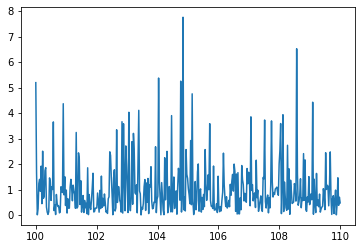

In [70]:
data = model(f, 105, 103, 0.1, 0.1, 2, 1.4, 1.0)*p
plt.plot(f, data)

In [71]:
test_model = pm.Model()
with test_model:
    l0 = pm.Normal('l0', 105, 1)
    l2 = pm.Normal('l2', 103, 1)
    width0 = pm.Lognormal('width0', np.log(0.1), 1.0)
    width2 = pm.Lognormal('width2', np.log(0.1), 1.0)
    height0 = pm.Lognormal('height0', np.log(3), 10.0)
    height2 = pm.Lognormal('height2', np.log(3), 10.0)
    back = pm.Lognormal('back', np.log(1.0), 0.5)
    
    limit = model(f, l0, l2, width0, width2, height0, height2, back)
    yobs = pm.Gamma('yobs', alpha=1, beta=1.0/limit, observed=data)

In [72]:
with test_model:
    trace = pm.sample(init='adapt_diag', cores=4, start=start)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:24<00:00, 162.53draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [73]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0,104.917229,0.981552,0.037390,1.028583e+02,106.882027,650.144004,1.003246
l2,103.084170,0.926552,0.034134,1.013936e+02,104.974663,499.366807,1.009804
width0,0.159263,0.211454,0.006949,4.367256e-03,0.509130,967.544784,1.000774
width2,0.158528,0.205541,0.005692,3.968370e-03,0.499582,1214.033374,0.999391
height0,1.172794,6.800032,0.495027,1.685559e-15,3.324625,190.428981,1.006271
height2,0.373181,1.161030,0.036860,2.843987e-14,1.953162,770.138701,1.003012
back,1.001631,0.053157,0.001539,8.900725e-01,1.101786,1080.198577,1.001023
